# In this notebook we look at how the eigenvalues/singular values or locally picked points from neighborshoods of radius $R$ of a nonlinear manifold with noise vary as a function of $R$.

In [1]:
import sys
sys.version

'2.7.12 |Anaconda 2.4.1 (x86_64)| (default, Jun 29 2016, 11:09:23) \n[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]'

In [2]:
## load trajectory data from file
import pickle

## diffusion maps
from diffusion_maps import run_diffusion_map
from diffusion_maps import make_gaussian_data

## numerical
import numpy as np
import numpy.linalg as la
from scipy.linalg import eigh

## plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
# from mpl_toolkits.mplot3d import axes3d
# import matplotlib.cm as cm

import vp_tree

In [3]:
N = 1000
dim = 100
k = 10
noise = 0.1

In [4]:
def make_data(  N = 1000,
            dim = 100,
            k = 10,
            noise = 0.1,
         ):
    '''
    Data points on k dimensional sphere (S^k) in dim dimensional ambient space.
    N points, contaminated by Gaussian iid noise with sigma = 0.1.
    '''
    data = make_gaussian_data(0.,1.,N,k)
    data = [np.hstack([d/la.norm(d),np.zeros(dim-k)]) for d in data]
    data_corruption = np.asarray(make_gaussian_data(0.,noise,N,dim))
    data += data_corruption
    return data

In [5]:
def make_into_arr(data):
    if type(data) != np.ndarray:
        if type(data) == list:
            data = np.asarray(data)
        else:
            raise ValueError("data should be numpy ndarray or list.")
    return data

In [85]:
def PCA_eigs(data):
    data = make_into_arr(data)
    mu = data.mean(axis=0,keepdims = True)
    data_centered = data - mu
    X = np.asmatrix(data_centered)
    Sigma = X.T*X/(dim-1)
    return la.eigvalsh(Sigma)

In [86]:
data = make_data(N,dim,k,noise)

## VP-tree for fast neighbor retrieval 

In [87]:
data_list = [vec.tolist() for vec in data]
tree = vp_tree.tree_container(data_list)

## Range of radii and sample size

In [88]:
def choose_random_neighborhood_points(data_list = data_list,sample_size = 40):
    '''
    pick sample_size points from data_list without replacement
    '''
    random_indices = np.random.choice(N,sample_size,replace=False)
    return [data_list[i] for i in random_indices]

In [89]:
rads = np.arange(1.,2.4,0.03)

In [90]:
sample_size = 20

In [91]:
sample_points = choose_random_neighborhood_points(data_list=data_list,sample_size=sample_size)

## Linear analysis (reproducing results from http://users.ju.edu/alittle2/Publications/Publication_AAAI.pdf)

In [92]:
## Linear analysis

In [95]:
eig_sum = np.zeros((dim,len(rads)))
for i,eps in enumerate(rads):
    for x in sample_points:
        neighbors = tree.find_within_epsilon(x,eps)
        eig_sum[:,i] += PCA_eigs(neighbors)
eig_sum /= sample_size

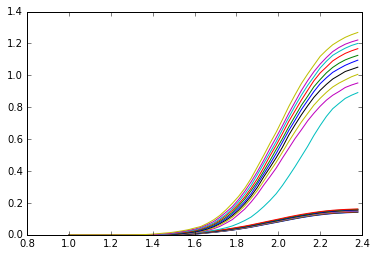

In [96]:
plt.plot(rads,eig_sum[80:].T);

## Nonlinear analysis (Using diffusion maps with $\epsilon$ kernel instead)

In [120]:
rads = np.arange(1.6,2.4,0.05)
params = {'alpha' :1., "eigen_dims": 20, "num_neighbors": 150}

eig_sum = np.zeros((params['eigen_dims'],len(rads)))
for i,eps in enumerate(rads):
    params['gaussian_epsilon'] = eps
    for x in sample_points[:5]:
        neighbors = tree.find_within_epsilon(x,eps)
        eig_vals = run_diffusion_map(neighbors,params,
                                     symmetric=False,neighbor_selection = "num_neighbors",
                                     return_eigenvectors = False)
        eig_sum[:,i] += np.asarray(eig_vals + [0] * (params['eigen_dims'] - len(eig_vals) ));
        
eig_sum /= params['eigen_dims']

using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_

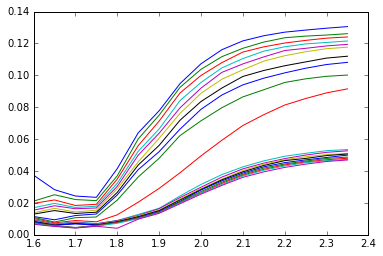

In [121]:
plt.plot(rads,eig_sum[1:,:].T);

In [ ]:
##### 

In [116]:
rads = np.arange(1.6,2.4,0.05)
params = {'alpha' :1., "eigen_dims": 20, "num_neighbors": 50}

eig_sum = np.zeros((params['eigen_dims'],len(rads)))
for i,eps in enumerate(rads):
    params['gaussian_epsilon'] = eps
    for x in sample_points[:5]:
        neighbors = tree.find_within_epsilon(x,eps)
        eig_vals = run_diffusion_map(neighbors,params,
                                     symmetric=False,neighbor_selection = "num_neighbors",
                                     return_eigenvectors = False)
        eig_sum[:,i] += np.asarray(eig_vals + [0] * (params['eigen_dims'] - len(eig_vals) ));
        
eig_sum /= params['eigen_dims']

using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_

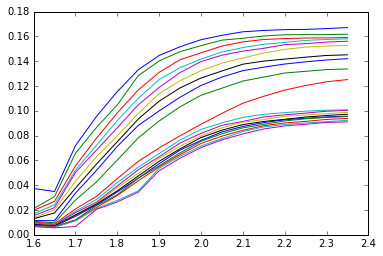

In [117]:
plt.plot(rads,eig_sum[1:,:].T);

In [ ]:
#########

In [118]:
rads = np.arange(1.6,2.4,0.05)
params = {'alpha' :1., "eigen_dims": 20, "num_neighbors": 30}

eig_sum = np.zeros((params['eigen_dims'],len(rads)))
for i,eps in enumerate(rads):
    params['gaussian_epsilon'] = eps
    for x in sample_points[:5]:
        neighbors = tree.find_within_epsilon(x,eps)
        eig_vals = run_diffusion_map(neighbors,params,
                                     symmetric=False,neighbor_selection = "num_neighbors",
                                     return_eigenvectors = False)
        eig_sum[:,i] += np.asarray(eig_vals + [0] * (params['eigen_dims'] - len(eig_vals) ));
        
eig_sum /= params['eigen_dims']

using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_neighbors  
using num_

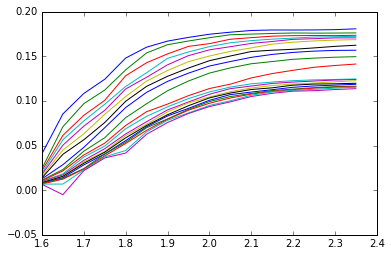

In [119]:
plt.plot(rads,eig_sum[1:,:].T);